In [0]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-r35sikoa
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-r35sikoa
  Stored in directory: /tmp/pip-ephem-wheel-cache-979sw1fe/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.10.0rc2+18.g744f6cb0b
    Uninstalling statsmodels-0.10.0rc2+18.g744f6cb0b:
      Successfully uninstalled statsmodels-0.10.0rc2+18.g744f6cb0b


In [0]:
!pip install PyDrive

In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime
import statsmodels.api as sm
import pandas as pd
import json
import numpy as np


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')


In [0]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [2]:
Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]

status_count=[]
hashtag_count=[]
friends_count=[]
mentions_TF=[]
favourites_count=[]
url_ratio_count=[]


with open('./ECE219_tweet_data/tweets_#superbowl.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count.append(json_object['metrics']['citations']['total'])
    tweet_time.append(datetime_object)
    
    ### new features:
    status_count.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF.append(0)
    else:
      mentions_TF.append(1)

    url_ratio_count.append(len(json_object['tweet']['entities']['urls']))
    favourites_count.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

#####go Hawks
tweet_time_gh=[]
follow_count_gh=[]
retweet_count_gh=[]

status_count_gh=[]
hashtag_count_gh=[]
friends_count_gh=[]
mentions_TF_gh=[]
favourites_count_gh=[]
url_ratio_count_gh=[]


with open('./ECE219_tweet_data/tweets_#gohawks.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count_gh.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count_gh.append(json_object['metrics']['citations']['total'])
    tweet_time_gh.append(datetime_object)
    
    ### new features:
    status_count_gh.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count_gh.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count_gh.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF_gh.append(0)
    else:
      mentions_TF_gh.append(1)

    url_ratio_count_gh.append(len(json_object['tweet']['entities']['urls']))
    favourites_count_gh.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

######go pats
Total_tweet=0
tweet_time_gp=[]
follow_count_gp=[]
retweet_count_gp=[]

status_count_gp=[]
hashtag_count_gp=[]
friends_count_gp=[]
mentions_TF_gp=[]
favourites_count_gp=[]
url_ratio_count_gp=[]


with open('./ECE219_tweet_data/tweets_#gopatriots.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count_gp.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count_gp.append(json_object['metrics']['citations']['total'])
    tweet_time_gp.append(datetime_object)
    
    ### new features:
    status_count_gp.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count_gp.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count_gp.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF_gp.append(0)
    else:
      mentions_TF_gp.append(1)

    url_ratio_count_gp.append(len(json_object['tweet']['entities']['urls']))
    favourites_count_gp.append(json_object['tweet']['user']['favourites_count'])
    

f.closed


#####nfl
Total_tweet=0
tweet_time_nfl=[]
follow_count_nfl=[]
retweet_count_nfl=[]

status_count_nfl=[]
hashtag_count_nfl=[]
friends_count_nfl=[]
mentions_TF_nfl=[]
favourites_count_nfl=[]
url_ratio_count_nfl=[]


with open('./ECE219_tweet_data/tweets_#nfl.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count_nfl.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count_nfl.append(json_object['metrics']['citations']['total'])
    tweet_time_nfl.append(datetime_object)
    
    ### new features:
    status_count_nfl.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count_nfl.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count_nfl.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF_nfl.append(0)
    else:
      mentions_TF_nfl.append(1)

    url_ratio_count_nfl.append(len(json_object['tweet']['entities']['urls']))
    favourites_count_nfl.append(json_object['tweet']['user']['favourites_count'])
    

f.closed
#####patriots
Total_tweet_pat=0
tweet_time_pat=[]
follow_count_pat=[]
retweet_count_pat=[]

status_count_pat=[]
hashtag_count_pat=[]
friends_count_pat=[]
mentions_TF_pat=[]
favourites_count_pat=[]
url_ratio_count_pat=[]


with open('./ECE219_tweet_data/tweets_#patriots.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count_pat.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count_pat.append(json_object['metrics']['citations']['total'])
    tweet_time_pat.append(datetime_object)
    
    ### new features:
    status_count_pat.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count_pat.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count_pat.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF_pat.append(0)
    else:
      mentions_TF_pat.append(1)

    url_ratio_count_pat.append(len(json_object['tweet']['entities']['urls']))
    favourites_count_pat.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

#sb49
Total_tweet=0
tweet_time_sb49=[]
follow_count_sb49=[]
retweet_count_sb49=[]

status_count_sb49=[]
hashtag_count_sb49=[]
friends_count_sb49=[]
mentions_TF_sb49=[]
favourites_count_sb49=[]
url_ratio_count_sb49=[]


with open('./ECE219_tweet_data/tweets_#sb49.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count_sb49.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count_sb49.append(json_object['metrics']['citations']['total'])
    tweet_time_sb49.append(datetime_object)
    
    ### new features:
    status_count_sb49.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count_sb49.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count_sb49.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF_sb49.append(0)
    else:
      mentions_TF_sb49.append(1)

    url_ratio_count_sb49.append(len(json_object['tweet']['entities']['urls']))
    favourites_count_sb49.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

True

In [3]:
min_time_sb=np.min(tweet_time)
min_time_gh=np.min(tweet_time_gh)
min_time_gp=np.min(tweet_time_gp)
min_time_nfl=np.min(tweet_time_nfl)
min_time_pat=np.min(tweet_time_pat)
min_time_sb49=np.min(tweet_time_sb49)


max_time_sb=np.max(tweet_time)
max_time_gh=np.max(tweet_time_gh)
max_time_gp=np.max(tweet_time_gp)
max_time_nfl=np.max(tweet_time_nfl)
max_time_pat=np.max(tweet_time_pat)
max_time_sb49=np.max(tweet_time_sb49)



minimum_time_unix=[min_time_sb,min_time_gh,min_time_gp,min_time_nfl,min_time_pat,min_time_sb49,max_time_sb,max_time_gh,max_time_gp,max_time_nfl,max_time_pat,max_time_sb49]
print(len(minimum_time_unix))
np.sort(minimum_time_unix, axis=0)

12


array([1421222404, 1421222681, 1421222838, 1421223187, 1421229011,
       1421238675, 1423295675, 1423304269, 1423332008, 1423335300,
       1423335336, 1423335336])

In [4]:
import pytz
import numpy as np
from datetime import timedelta



sortTime= np.sort(minimum_time_unix, axis=0)


mint=datetime.datetime.fromtimestamp(sortTime[0])
maxt=datetime.datetime.fromtimestamp(sortTime[-1])
timerange=maxt-mint
print("True range in hour : ",timerange.total_seconds()/(60*60))
print("Total bins = ",np.ceil(timerange.total_seconds()/(60*60)))
total_time_range= timerange.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)



pst_tz = pytz.timezone('America/Los_Angeles')

min_tweet_time= np.min(tweet_time)
pstTimeDelta    = datetime.timedelta(hours=-8)
tzObject        = datetime.timezone(pstTimeDelta, name="PST")

before_time=datetime.datetime(2015,2,1,8,0,0,0,tzObject)
after_time= datetime.datetime(2015,2,1,20,0,0,0,tzObject)



arbTime1=datetime.datetime(2015,2,1,7,59)#20
arbTime2=datetime.datetime(2015,2,1,8,0)#21
arbTime3=datetime.datetime(2015,2,1,8,4,59)#21
arbTime4=datetime.datetime(2015,2,1,8,5)#22
arbTime5= datetime.datetime(2015,2,1,19,59)




print(arbTime1)
print(arbTime2)
print(arbTime3)
some_arb_time= [arbTime1, arbTime2, arbTime3, arbTime4,arbTime5]


# for element in some_arb_time:
#   if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0:
#     print('#'*20)
#     print("in between this", element)
#     print('#'*20)
#   if (element- after_time).total_seconds()/(60*60) >=0:
#     print("this time is greater than after time", element)
#   if (before_time-element).total_seconds()/(60*60) >0:
#     print("this time is before superbowl time",element)
    
    
    
    
    
print("Before date/time",before_time)
print("Before date/time",after_time)
# print("Before time- maxt",(arbTime2-after_time).total_seconds()/(60*60))
# print(after_time-maxt)
minute_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).minute
second_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).second

timeD=timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)
min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time,pst_tz)-timeD


True range in hour :  586.9255555555555
Total bins =  587.0
Average number of tweets per hour 2068.08681017657
2015-02-01 07:59:00
2015-02-01 08:00:00
2015-02-01 08:04:59
Before date/time 2015-02-01 08:00:00-08:00
Before date/time 2015-02-01 20:00:00-08:00


In [0]:


bin_arr=[]
for myelement in tweet_time:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)
  mybin= int((element-min_time_conv).total_seconds()/(60*60))
  bin_arr.append(mybin)

bin_arr_gh=[]
for myelement in tweet_time_gh:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)  
  mybin= int((element-min_time_conv).total_seconds()/(60*60))
  bin_arr_gh.append(mybin)
    
bin_arr_gp=[]
for myelement in tweet_time_gp:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)
  mybin= int((element-min_time_conv).total_seconds()/(60*60))
  bin_arr_gp.append(mybin)
    
bin_arr_nfl=[]
for myelement in tweet_time_nfl:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)
  mybin= int((element-min_time_conv).total_seconds()/(60*60))
  bin_arr_nfl.append(mybin)
    
bin_arr_pat=[]
for myelement in tweet_time_pat:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)
  mybin= int((element-min_time_conv).total_seconds()/(60*60))
  bin_arr_pat.append(mybin)
    
bin_arr_sb49=[]
for myelement in tweet_time_sb49:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)  
  mybin= int((element-min_time_conv).total_seconds()/(60*60))
  bin_arr_sb49.append(mybin)

In [0]:

# min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time,pst_tz)-timeD
# print(datetime.datetime.fromtimestamp(min_tweet_time,pst_tz))
# print(min_time_conv)

# # print(some_arb_time)
# tweet_window=[]



# arbTime1=datetime.datetime(2015,1,14,9,13,0,0,tzObject)
# arbTime2=datetime.datetime(2015,2,1,7,1,0,0,tzObject)
# arbTime3=datetime.datetime(2015,2,1,9,0,0,0,tzObject)
# arbTime4=datetime.datetime(2015,2,1,8,0,0,0,tzObject)
# arbTime5= datetime.datetime(2015,2,1,19,59,0,0,tzObject)
# arbTime6= datetime.datetime(2015,2,1,20,0,1,0,tzObject)
# arbTime7= datetime.datetime(2015,2,7,10,0,0,0,tzObject)

# some_arb_time= [arbTime1, arbTime2, arbTime3, arbTime4,arbTime5,arbTime6,arbTime7]

# # conv_tweet_time=[]
# # for element in tweet_time:
# #   conv_tweet_time.append(datetime.datetime.fromtimestamp(element, pst_tz))
  
# bin_arr=[]
# for myelement in tweet_time:
#   element=datetime.datetime.fromtimestamp(myelement, pst_tz)
#   if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
    
#     mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
# #     print("date",date_delta)
# #     print("before time", before_time)
# #     print("first time", min_time_conv)
    
# #     mybin = int(min_time_conv.hour)
# #     mybin= int((element-min_time_conv).total_seconds()/(60*60))
# #     print(mybin)
# #     print("hour division bin", int(element.hour-8)*12)
# #     print("bin during superbowl",int(element.minute/5))
#     this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
# #     print(element)
# # #     print("mybin:",mybin)
# #     print("SuperBowl time:  This corresponding bin number is", this_bin)
#     bin_arr.append(this_bin)
#   if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
#     after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
# #     after_my_bin=int((element - after_time).total_seconds()/(60*60))+144+ (after_time - min_time_conv).total_seconds()/(60*60*24)*24
# #     mybin= int((element-min_time_conv).total_seconds()/(60*60))+ after_my_bin
# #     print("ele-mintime",element-min_time_conv)
# #     print(element)
# #     print("bin number after the superbowl", after_my_bin)
#     bin_arr.append(after_my_bin)
#   if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
#     mybin= int((element-min_time_conv).total_seconds()/(60*60))
#     bin_arr.append(mybin)
# #     print(element)
# #     print("bin number is before superbowl",mybin)
  

In [0]:

# bin_arr_gh=[]
# for myelement in tweet_time_gh:
#   element=datetime.datetime.fromtimestamp(myelement, pst_tz)
#   if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
#     mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
#     this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
#     bin_arr_gh.append(this_bin)
#   if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
#     after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
#     bin_arr_gh.append(after_my_bin)
#   if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
#     mybin= int((element-min_time_conv).total_seconds()/(60*60))
#     bin_arr_gh.append(mybin)
    
# bin_arr_gp=[]
# for myelement in tweet_time_gp:
#   element=datetime.datetime.fromtimestamp(myelement, pst_tz)
#   if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
#     mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
#     this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
#     bin_arr_gp.append(this_bin)
#   if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
#     after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
#     bin_arr_gp.append(after_my_bin)
#   if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
#     mybin= int((element-min_time_conv).total_seconds()/(60*60))
#     bin_arr_gp.append(mybin)
    
# bin_arr_nfl=[]
# for myelement in tweet_time_nfl:
#   element=datetime.datetime.fromtimestamp(myelement, pst_tz)
#   if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
#     mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
#     this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
#     bin_arr_nfl.append(this_bin)
#   if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
#     after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
#     bin_arr_nfl.append(after_my_bin)
#   if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
#     mybin= int((element-min_time_conv).total_seconds()/(60*60))
#     bin_arr_nfl.append(mybin)
    
# bin_arr_pat=[]
# for myelement in tweet_time_pat:
#   element=datetime.datetime.fromtimestamp(myelement, pst_tz)
#   if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
#     mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
#     this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
#     bin_arr_pat.append(this_bin)
#   if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
#     after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
#     bin_arr_pat.append(after_my_bin)
#   if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
#     mybin= int((element-min_time_conv).total_seconds()/(60*60))
#     bin_arr_pat.append(mybin)
    
# bin_arr_sb49=[]
# for myelement in tweet_time_sb49:
#   element=datetime.datetime.fromtimestamp(myelement, pst_tz)
#   if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
#     mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
#     this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
#     bin_arr_sb49.append(this_bin)
#   if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
#     after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
#     bin_arr_sb49.append(after_my_bin)
#   if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
#     mybin= int((element-min_time_conv).total_seconds()/(60*60))
#     bin_arr_sb49.append(mybin)

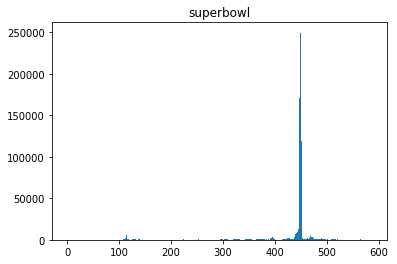

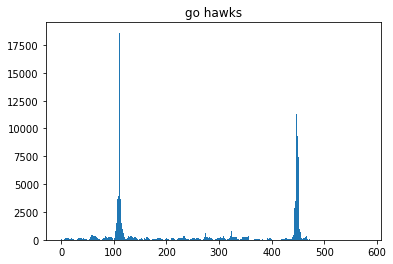

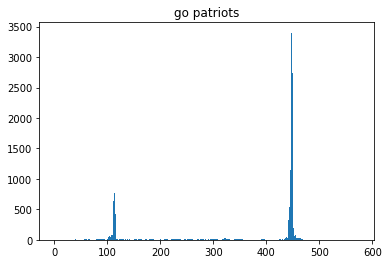

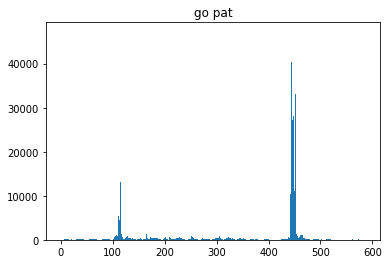

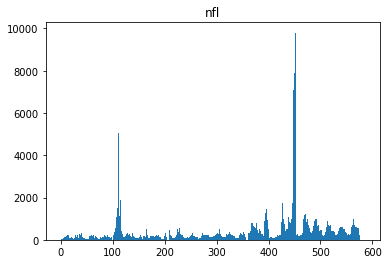

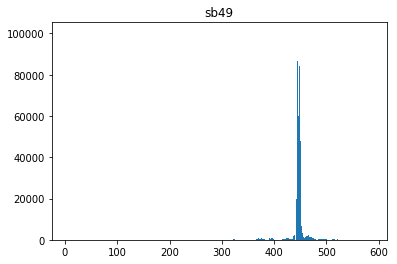

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(bin_arr, bins=np.max(bin_arr))
plt.title('superbowl')
plt.show()
plt.figure()
plt.hist(bin_arr_gh, bins=np.max(bin_arr_gh))
plt.title('go hawks')
plt.show()
plt.figure()
plt.hist(bin_arr_gp, bins=np.max(bin_arr_gp))
plt.title('go patriots')
plt.show()
plt.figure()
plt.hist(bin_arr_pat, bins=np.max(bin_arr_pat))
plt.title('go pat')
plt.show()
plt.figure()
plt.hist(bin_arr_nfl, bins=np.max(bin_arr_nfl))
plt.title('nfl')
plt.show()
plt.figure()
plt.hist(bin_arr_sb49, bins=np.max(bin_arr_sb49))
plt.title('sb49')
plt.show()

In [8]:
#superbowl
print(int(timerange.total_seconds()/(60*60))+1)
retweet_array_window=[]
retweet_array_window_gh=[]
retweet_array_window_gp=[]
retweet_array_window_pat=[]
retweet_array_window_nfl=[]
retweet_array_window_sb49=[]
for i in range(int(timerange.total_seconds()/(60*60))+1):
  retweet_array_window.append(np.where(np.asarray(bin_arr,dtype=int)==i))
  retweet_array_window_gh.append(np.where(np.asarray(bin_arr_gh,dtype=int)==i))
  retweet_array_window_gp.append(np.where(np.asarray(bin_arr_gp,dtype=int)==i))
  retweet_array_window_pat.append(np.where(np.asarray(bin_arr_pat,dtype=int)==i))
  retweet_array_window_nfl.append(np.where(np.asarray(bin_arr_nfl,dtype=int)==i))
  retweet_array_window_sb49.append(np.where(np.asarray(bin_arr_sb49,dtype=int)==i))


587


In [0]:
def getinfo(window,retweet,follow,status,hashtag, friends, mentions,favourites, time ):
  
  my_tweet_count=[]
  my_retweet_count=[]
  my_follow_count=[]
  my_max_follower_count=[]
  my_time_of_day=[]

  my_status_count=[] #get how many status in certain hour
  my_hashtag_count=[] #get how many hashtags in certain hour
  my_friends_count=[] #max friend count
  my_mentions_TF=[] #
  my_favourites_count=[]

  for element in window:
    for innerelement in element:
  #     print(innerelement)[]
      item_tweet=0
      item=0
      item1=0
      maxitem2=0
      timeitem=0

      item_status=0
      item_hashtag=0
      item_friends=0
      item_mentions=0
      item_favourites=0
      for indexlayer in innerelement:  
        item=retweet[indexlayer]+item
        item1=follow[indexlayer]+item1
        timeitem=datetime.datetime.fromtimestamp(time[indexlayer], pst_tz).hour     
        item_status= status[indexlayer]+ item_status
        item_hashtag=hashtag[indexlayer]+ item_hashtag
        item_friends=item_friends+ friends[indexlayer]
        item_mentions=item_mentions+ mentions[indexlayer]
        item_favourites=item_favourites+ favourites[indexlayer] 
        if maxitem2 < follow[indexlayer]:
          maxitem2= follow[indexlayer]
      my_time_of_day.append(timeitem)   
      my_max_follower_count.append(maxitem2)  
      my_retweet_count.append(item)
      my_follow_count.append(item1)

      my_status_count.append(item_status)
      my_hashtag_count.append(item_hashtag)
      my_friends_count.append(item_friends)
      my_mentions_TF.append(item_mentions)
      my_favourites_count.append(item_favourites)
  return my_retweet_count, my_follow_count, my_max_follower_count, my_time_of_day,my_status_count, my_hashtag_count, my_friends_count, my_mentions_TF, my_favourites_count


a1, a2,a3,a4,a5,a6,a7,a8,a9= getinfo(retweet_array_window,retweet_count,follow_count,
                                     status_count,hashtag_count,friends_count,
                                     mentions_TF,favourites_count,tweet_time)

b1, b2,b3,b4,b5,b6,b7,b8,b9= getinfo(retweet_array_window_gh,retweet_count_gh,
                                     follow_count_gh,status_count_gh,hashtag_count_gh,
                                     friends_count_gh,mentions_TF_gh,favourites_count_gh,
                                     tweet_time_gh)

c1, c2,c3,c4,c5,c6,c7,c8,c9= getinfo(retweet_array_window_gp,retweet_count_gp,
                                     follow_count_gp,status_count_gp,hashtag_count_gp,
                                     friends_count_gp,mentions_TF_gp,favourites_count_gp,
                                     tweet_time_gp)

d1, d2,d3,d4,d5,d6,d7,d8,d9= getinfo(retweet_array_window_pat,retweet_count_pat,follow_count_pat,
                                     status_count_pat,hashtag_count_pat,friends_count_pat,
                                     mentions_TF_pat,favourites_count_pat,tweet_time_pat)

e1, e2,e3,e4,e5,e6,e7,e8,e9= getinfo(retweet_array_window_nfl,retweet_count_nfl,follow_count_nfl,
                                     status_count_nfl,hashtag_count_nfl,friends_count_nfl,
                                     mentions_TF_nfl,favourites_count_nfl,tweet_time_nfl)

f1, f2,f3,f4,f5,f6,f7,f8,f9= getinfo(retweet_array_window_sb49,retweet_count_sb49,follow_count_sb49,
                                     status_count_sb49,hashtag_count_sb49,friends_count_sb49,
                                     mentions_TF_sb49,favourites_count_sb49,tweet_time_sb49)
n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
n_tweet_gh= np.histogram(bin_arr_gh,bins=np.max(bin_arr)+1)
n_tweet_gp= np.histogram(bin_arr_gp,bins=np.max(bin_arr)+1)
n_tweet_pat= np.histogram(bin_arr_pat,bins=np.max(bin_arr)+1)
n_tweet_nfl= np.histogram(bin_arr_nfl,bins=np.max(bin_arr)+1)
n_tweet_sb49= np.histogram(bin_arr_sb49,bins=np.max(bin_arr)+1)

In [0]:
# print(a2[0])
# print(b2[0])
# print(c2[0])
# print(d2[0])
# print(e2[0])
# print(f2[0])
# print('#'*20)
# print(a2[1])
# print(b2[1])
# print(c2[1])
# print(d2[1])
# print(e2[1])
# print(f2[1])
agg_tweet= np.add(np.add(np.add(n_tweet[0],n_tweet_gh[0]),
                         np.add(n_tweet_gp[0],n_tweet_nfl[0])),
                  np.add(n_tweet_pat[0],n_tweet_sb49[0]))

agg_retweet= np.add(np.add(np.add(a1,b1),np.add(c1,d1)),np.add(e1,f1))
agg_num_follower=np.add(np.add(np.add(a2,b2),np.add(c2,d2)),np.add(e2,f2))
# print(agg_num_follower[0:10])
agg_max_follower=[]
for i in range(len(retweet_array_window)):
  agg_max_follower.append(np.max([a2[i],b2[i],c2[i],d2[i],e2[i]]))
  
agg_total_status=np.add(np.add(np.add(a5,b5),np.add(c5,d5)),np.add(e5,f5))

agg_total_hashtags=np.add(np.add(np.add(a6,b6),np.add(c6,d6)),np.add(e6,f6))
agg_num_friends=np.add(np.add(np.add(a7,b7),np.add(c7,d7)),np.add(e7,f7))
agg_num_mentions=np.add(np.add(np.add(a8,b8),np.add(c8,d8)),np.add(e8,f8))
agg_num_fav=np.add(np.add(np.add(a9,b9),np.add(c9,d9)),np.add(e9,f9))

In [0]:
# n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
# n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
# n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
# n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
# n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
# print(len(agg_tweet))            
# print(len(my_retweet_count))
# print(len(my_follow_count))
# print(len(my_max_follower_count))
# print(len(my_time_of_day))

df = pd.DataFrame({
    '# of Tweets' : agg_tweet,
    '# of retweets' : agg_retweet,
    'Sum n followers': agg_num_follower,
    'Max followers': agg_max_follower,
    'Time of day': a4,
    'Status': agg_total_status,
    'Hashtags': agg_total_hashtags,
    'Friends': agg_num_friends,
    'Mentions': agg_num_mentions,
    'Favourites': agg_num_fav
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
#                   'Time of day',
                  'Status', 
#                   'Hashtags', 
                  'Friends', 
                  'Mentions',
                  'Favourites'
                 ])

In [12]:
print(df.head())

   # of Tweets  # of retweets  Sum n followers  ...  Friends  Mentions  Favourites
0          113            714         223405.0  ...   324681        26      169019
1           89            663         187317.0  ...   127783        17      126515
2          111            640        1657090.0  ...   248634        19      219997
3          104            267         165256.0  ...   116850        19       96787
4          137            468         444858.0  ...   393159        43      164014

[5 rows x 8 columns]


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [14]:
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Favourites'].values)
input_arr.pop()

array([5.400000e+01, 8.000000e+01, 6.777440e+05, 4.966300e+04,
       1.175482e+06, 2.886010e+05, 2.400000e+01, 7.120400e+04])

In [0]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)


In [16]:
# input_arr = sm.add_constant(input_arr)
output_arr = df[ '# of Tweets'].values
myoutput= output_arr[1:]
print(len(output_arr))
# print((myoutput))

587


In [0]:
regr=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

regr.fit(input_arr, myoutput)
myprediction= regr.predict(input_arr)

In [24]:
regr.fit(input_arr, myoutput)
print("R-squared",regr.score(input_arr,myoutput))
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()
print("MSE= ", (rmse(myprediction, myoutput)))

R-squared 0.8305822724845209
MSE=  120808184.30034362


In [20]:
# input_arr, input_arr, myoutput, myoutput = train_test_split(input_arr, myoutput, test_size=0.1, random_state=42,shuffle=False)

regr = RandomForestRegressor(max_depth=2)
regr.fit(input_arr, myoutput)
predicta= regr.predict(input_arr)
print((predicta[0]))
print((myoutput)[0])
regr.score(input_arr,myoutput)
print(input_arr[0])
print(input_arr[0])
print("Test result",regr.score(input_arr,myoutput))
print("MSE= ", (rmse(predicta, myoutput)))

1416.9795299650234
89
[1.130000e+02 7.140000e+02 2.234050e+05 1.001540e+05 6.864286e+06
 3.246810e+05 2.600000e+01 1.690190e+05]
[1.130000e+02 7.140000e+02 2.234050e+05 1.001540e+05 6.864286e+06
 3.246810e+05 2.600000e+01 1.690190e+05]
Test result 0.8746558144851131
MSE=  87582783.19910772


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:


from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor(max_depth=2)
regr.fit(input_arr, myoutput)
regr.score(input_arr,myoutput)
print(regr.predict(input_arr)[0:10])
print(regr.score(input_arr,myoutput))

[480.09698004 480.09698004 480.09698004 480.09698004 480.09698004
 480.09698004 480.09698004 579.64481972 689.18934984 689.18934984]
0.9986146976680232


In [0]:
print((myoutput.shape))
myoutput[1]

(586,)


111

In [0]:
print(df.head())

   # of Tweets  # of retweets  Sum n followers  ...  Friends  Mentions  Favourites
0          113            714         223405.0  ...   324681        26      169019
1           89            663         187317.0  ...   127783        17      126515
2          111            640        1657090.0  ...   248634        19      219997
3          104            267         165256.0  ...   116850        19       96787
4          137            468         444858.0  ...   393159        43      164014

[5 rows x 8 columns]


In [0]:

input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Favourites'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# input_arr, input_arr, myoutput, myoutput = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()
print((rmse(output_predicted, output_arr)))
res = model.fit()

print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)

38348647.11960916
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1242.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        03:26:58   Log-Likelihood:                -5947.9
No. Observations:                 586   AIC:                         1.191e+04
Df Residuals:                     577   BIC:                         1.195e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        625.2046    392.861  

In [0]:
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Favourites'].values)
input_arr.pop()#delete last row

# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
from sklearn.model_selection import KFold


cv= KFold(5, shuffle=True)

cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)
pipeline = Pipeline([

    ('clf', RandomForestRegressor()),
],memory=memory)


param_grid = [
    {
    'clf': [RandomForestRegressor(n_jobs=4)],
    'clf__max_depth': [10, 20, 40, 60, 80, 100, 200, None],
    'clf__max_features': ['auto', 'sqrt'],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__min_samples_split': [2, 5, 10],
    'clf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }
      ,{
    'clf': [GradientBoostingRegressor()],
    'clf__max_depth': [10, 20, 40, 60, 80, 100, 200, None],
    'clf__max_features': ['auto', 'sqrt'],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__min_samples_split': [2, 5, 10],
    'clf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
          
          
          
          
      }
      ]

grid = GridSearchCV(pipeline, cv=cv, n_jobs=4, param_grid=param_grid,scoring='neg_mean_squared_error')
grid.fit(input_arr, output_arr)
rmtree(cachedir)
# a=pd.DataFrame(grid.cv_results_)
# a.to_csv(index=False)
# a.to_csv( './SBGrid.csv')
# from google.colab import files 
# files.download('SBGrid.csv')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/tmp/tmp9pa8n9fv'", use "location='/tmp/tmp9pa8n9fv'" instead.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a m

In [0]:
import pandas as pd

a=pd.DataFrame(grid.cv_results_)

In [0]:
print(a)
a.to_csv(index=False)
a.to_csv( './Q8Grid.csv')######

      mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0          1.449177      0.244596  ...    1.144717e+08             1223
1          2.829284      0.252337  ...    1.102521e+08             1410
2          4.335072      0.159713  ...    1.032126e+08             1142
3          5.844753      0.294233  ...    1.058515e+08             1227
4          7.389675      0.262134  ...    1.102045e+08             1335
5          9.982361      0.615659  ...    1.068624e+08             1161
6         11.092120      0.612611  ...    1.062497e+08             1146
7         13.360299      0.214219  ...    1.060335e+08             1163
8         15.158026      0.311105  ...    1.067451e+08             1236
9         17.184269      0.542341  ...    1.048334e+08             1181
10         2.117521      0.178869  ...    8.739201e+07             1396
11         3.602127      0.346295  ...    8.785255e+07             1325
12         4.289574      0.232421  ...    9.127780e+07          

In [0]:
from google.colab import files 
files.download('Q8Grid.csv')

In [0]:
# clf': GradientBoostingRegressor(alpha=0.9, 
#             criterion='friedman_mse', 
#             init=None,
#             learning_rate=0.1, 
#             loss='ls', 
#             max_depth=None,
#             max_features='sqrt', 
#             max_leaf_nodes=None,
#             min_impurity_decrease=0.0, 
#             min_impurity_split=None,
#             min_samples_leaf=4,
#             min_samples_split=10,
#             min_weight_fraction_leaf=0.0,
#             n_estimators=400,
#             n_iter_no_change=None, 
#             presort='auto',
#             random_state=None, 
#             subsample=1.0, tol=0.0001,
#             validation_fraction=0.1, 
#             verbose=0,
#             warm_start=False), 
#             'clf__max_depth': None, 
#             'clf__max_features': 'sqrt', 
#             'clf__min_samples_leaf': 4, 
#             'clf__min_samples_split': 5, 
#             'clf__n_estimators': 2000}

In [0]:

input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Time of day'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# input_arr, input_arr, myoutput, myoutput = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()
print((rmse(output_predicted, output_arr)))
res = model.fit()

print(res.summary())

In [0]:

regr = GradientBoostingRegressor(alpha=.9,criterion='friedman_mse', 
            init=None,
            learning_rate=0.01, 
            loss='ls', 
            max_depth=None,
            max_features='sqrt', 
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_impurity_split=None,
            min_samples_leaf=4,
            min_samples_split=5,
            min_weight_fraction_leaf=0.0,
            n_estimators=400,
            n_iter_no_change=None, 
            presort='auto',
            random_state=None, 
            subsample=1.0, tol=0.0001,
            validation_fraction=0.1, 
            verbose=0,
            warm_start=False)

regr.fit(input_arr, output_arr)
print("R-squared",regr.score(input_arr,output_arr))
output_predictedGBoost= regr.predict(input_arr)
print("MSE:",(rmse(output_predictedGBoost, output_arr)))